<a href="https://colab.research.google.com/github/khudson2021/Probability_Statistics/blob/main/Kristie_Hudson_Stats_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STA 2023 Final Project
## Directions:

1) Replace the image dataset in the google slides with your own data.

2) Comment and explain all code to the best of your ability.

3) Run your model 3 times. 

4) Report best, worst, and average of the three runs. 




Use any and all resources available to you.

Comment and explain the code.

Answer the questions to the best of your abilities.

If you have any questions, txt 561-479-8123

Save this notebook to your GitHub and submit the link on Canvas


In [3]:
%%capture
!pip install wandb # this is a set of tools
!apt-get install poppler-utils # this is a set of tools
!pip install pdf2image # this is a set of tools
!pip install flashtorch # this is a set of tools 
import requests # this is a set of tools
from pdf2image import convert_from_path # this is a set of tools
import matplotlib.pyplot as plt # this is a set of tools
import numpy as np # this is a set of tools
import torch # this is a set of tools
import requests # this is a set of tools
from torchvision import * # this is a set of tools
from torchvision.models import * # this is a set of tools
from flashtorch.utils import apply_transforms # this is a set of tools
import wandb as wb # this is a set of tools

In [4]:
def GPU(data): # this defines a function to be carried out 
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda')) # this is a function to be carried out 

def GPU_data(data): # this defines a function to be carried out 
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda')) # this is a function to be carried out 

def plot(x): # this defines a function to be carried out 
    fig, ax = plt.subplots() # this is used to customize and help plot the graph
    im = ax.imshow(x, cmap = 'gray') # this is used to customize and help plot the graph
    ax.axis('off') # this is used to customize and help plot the graph
    fig.set_size_inches(5, 5) # this is used to customize and help plot the graph
    plt.show() # this shows the graph 
    
def get_google_slide(url): # this defines a function to be carried out 
    url_head = "https://docs.google.com/presentation/d/" # this is used to get the url 
    url_body = url.split('/')[5] # this separates the url 
    page_id = url.split('.')[-1] # this gives us the page ids
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id # this combines the urls 

def get_slides(url): # this defines a function to be carried out 
    url = get_google_slide(url) # this gets the google slides 
    r = requests.get(url, allow_redirects=True) # this allows for it to happen 
    open('file.pdf', 'wb').write(r.content) # this opens the google slides
    images = convert_from_path('file.pdf', 500) # this gets all of the images 
    return images # this outputs the images 

def load(image): # this loads the images 

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device) # this outputs the images

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # this allows for it to happen 

In [5]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()} # this is used to get the labels 

model = alexnet(weights='DEFAULT').to(device) # this is used to get the model 
model.eval(); # this allows for it to happen 

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [6]:
url = "https://docs.google.com/presentation/d/1lyE52a0yLCu9iUiKeFmdKayGJhu2Z6fyToXEMKeigoY/edit#slide=id.p" # this is a url 

In [7]:
url = "https://docs.google.com/presentation/d/1NUotE9I69A76I2QbXaBFwuHls1pBJ2_qxvgQmZYqeos/edit#slide=id.g180c250f7a7_0_213"

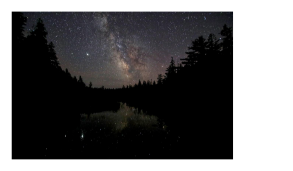

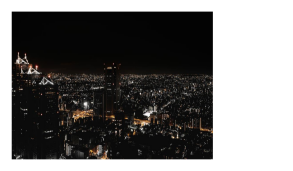

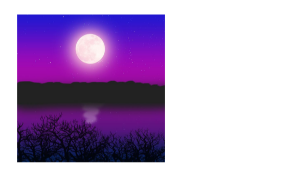

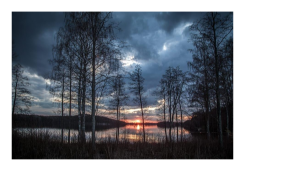

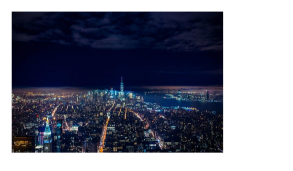

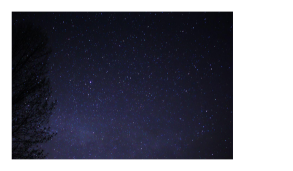

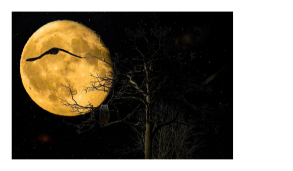

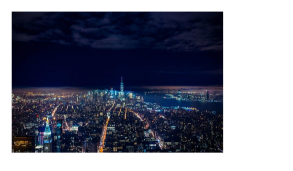

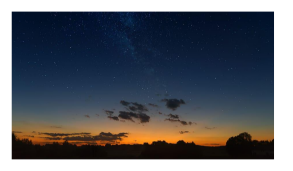

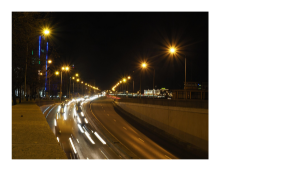

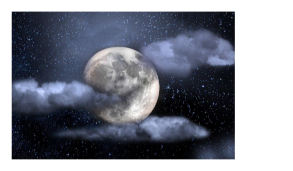

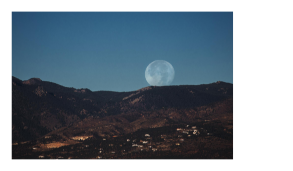

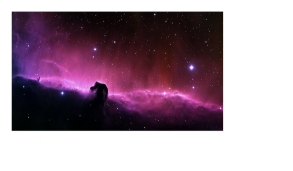

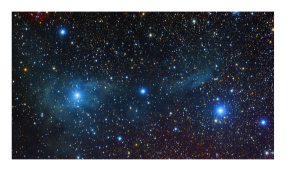

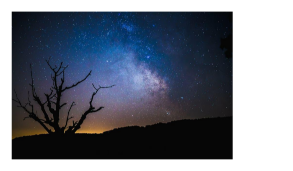

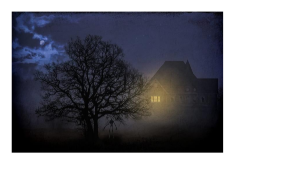

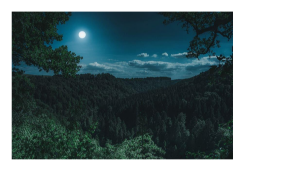

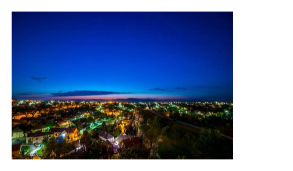

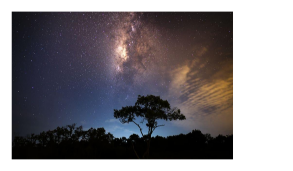

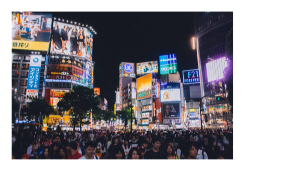

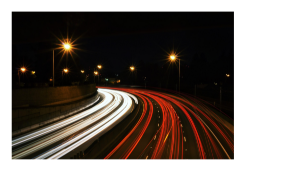

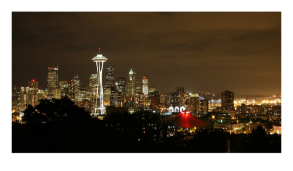

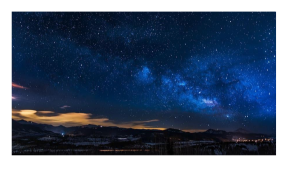

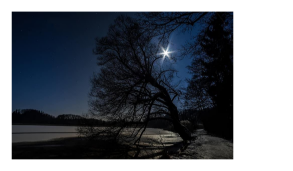

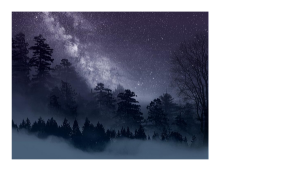

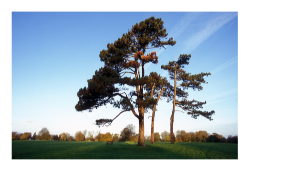

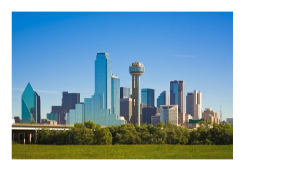

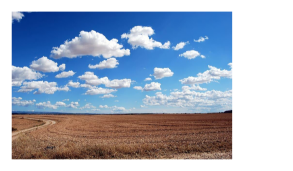

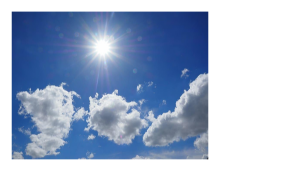

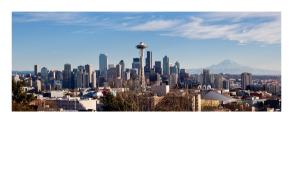

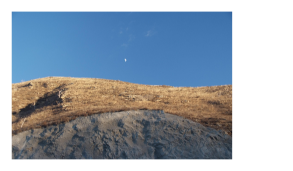

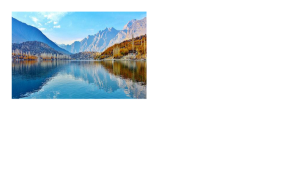

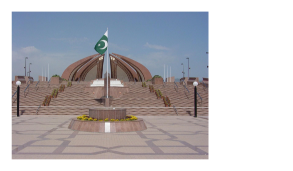

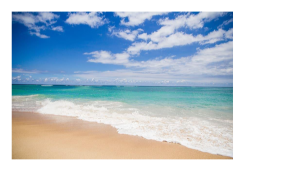

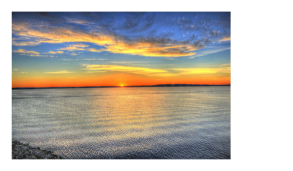

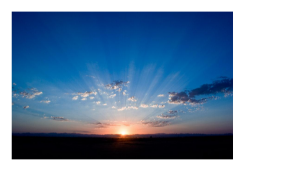

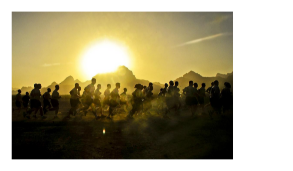

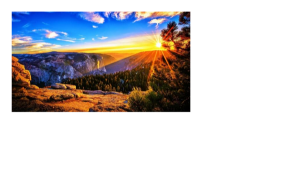

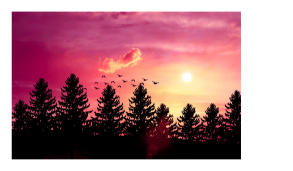

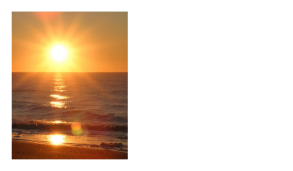

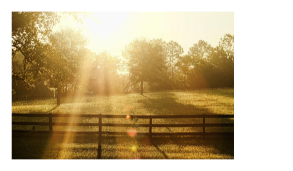

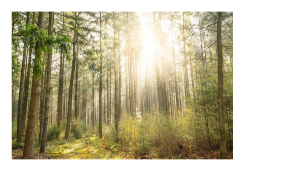

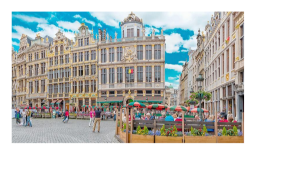

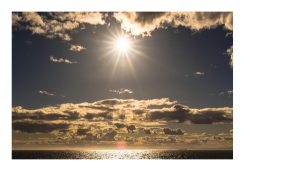

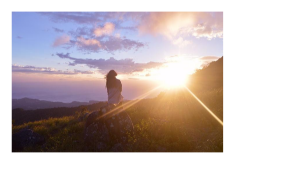

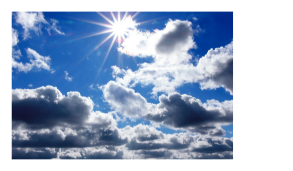

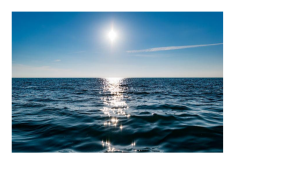

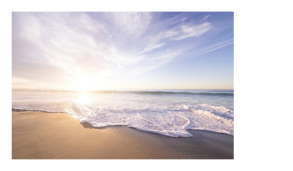

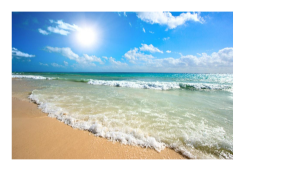

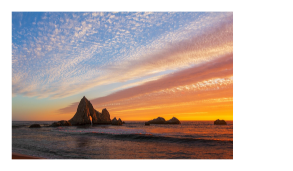

In [8]:
images = [] # this is an empty set

for image in get_slides(url): # this is a for loop

    plot(image) # this plots the image 

    images.append(load(image)) # this loads the image

images = torch.vstack(images) # this stacks them one after the other 

In [9]:
images.shape # this is the shape of the images

torch.Size([50, 3, 224, 224])

In [10]:
model(images) # this is the model of the images 

tensor([[ 1.5729,  0.2151,  5.3921,  ..., -0.0263,  0.4383, -0.5430],
        [-2.1427, -2.1489, -0.2784,  ..., -2.8869,  0.4065, -1.5757],
        [-2.1586,  1.5750, -0.9598,  ..., -2.7485,  0.5440,  3.8496],
        ...,
        [-0.1366, -2.4357,  3.3282,  ..., -2.9503, -0.6613,  1.1636],
        [ 1.2945, -1.4425,  2.7275,  ..., -4.5174,  2.7700,  0.3548],
        [-1.4946,  1.6430, -0.4687,  ..., -3.6025,  0.6648, -0.8925]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [11]:
y = model(images) # this assigns the model to variable y 

In [12]:
y.shape # this is the shape of y

torch.Size([50, 1000])

In [13]:
guesses = torch.argmax(y, 1).cpu().numpy() # this gives us the guesses 

In [14]:
for i in list(guesses): # this is a for loop
    print(labels[i]) # this prints the labels

radio telescope, radio reflector
web site, website, internet site, site
web site, website, internet site, site
lakeside, lakeshore
drilling platform, offshore rig
nematode, nematode worm, roundworm
jellyfish
drilling platform, offshore rig
beacon, lighthouse, beacon light, pharos
pier
nematode, nematode worm, roundworm
volcano
theater curtain, theatre curtain
fountain
volcano
volcano
alp
monitor
lakeside, lakeshore
scoreboard
carousel, carrousel, merry-go-round, roundabout, whirligig
drilling platform, offshore rig
television, television system
mountain tent
barn
seashore, coast, seacoast, sea-coast
water tower
hay
rapeseed
breakwater, groin, groyne, mole, bulwark, seawall, jetty
valley, vale
web site, website, internet site, site
umbrella
sandbar, sand bar
sandbar, sand bar
seashore, coast, seacoast, sea-coast
volcano
monitor
stage
pill bottle
fountain
fountain
palace
geyser
space shuttle
trailer truck, tractor trailer, trucking rig, rig, articulated lorry, semi
seashore, coast, seaco

In [15]:
Y = np.zeros(50,) # this stores 50 zeroes in Y
Y[25:] = 1 # this assigns ones from the 25th number onward

In [16]:
Y # this displays Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [17]:
X = y.detach().cpu().numpy() # this detaches the model y and stores it in X

In [18]:
X.shape # this is the shape of X

(50, 1000)

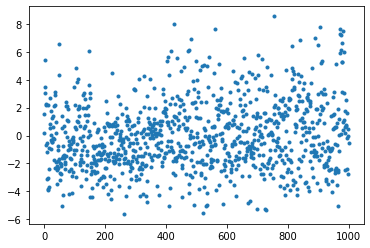

In [19]:
plt.plot(X[0],'.') # this plots the graph 

In [20]:
X[0] # this displays the first position in array X

array([ 1.57293057e+00,  2.15052009e-01,  5.39213800e+00,  3.07509828e+00,
        3.47263479e+00,  2.20677042e+00,  2.29259038e+00, -6.75322533e-01,
       -3.08384871e+00, -5.10824680e-01, -1.17449355e+00, -3.85042167e+00,
       -3.88360882e+00,  2.20373774e+00, -3.04394150e+00, -9.16132867e-01,
       -3.70674658e+00, -2.39008021e+00,  8.48899841e-01,  5.31155765e-01,
        2.67093325e+00, -3.24001908e-01,  6.05794191e-02,  1.75746632e+00,
       -9.67072487e-01, -4.57764626e-01,  1.28829324e+00, -4.30536538e-01,
        1.41175175e+00,  6.14482760e-01, -1.50470793e-01, -2.47397989e-01,
       -1.76230490e+00,  2.11605358e+00,  2.90503407e+00,  2.16124964e+00,
        3.10201883e+00, -2.29314613e+00,  9.53254998e-01,  2.04301313e-01,
       -1.91689086e+00, -3.47357750e+00, -2.14471459e+00, -2.43991017e+00,
       -1.06538403e+00, -1.79704297e+00, -2.29147601e+00, -7.54918933e-01,
       -1.66696966e+00,  4.29885769e+00,  6.54913902e+00, -1.94529974e+00,
       -3.19729424e+00, -

In [21]:
np.argmax(X[0]) # this is used to get the max 

755

In [22]:
labels[585] # this gets the respective label

'hair spray'

In [23]:
top_ten = np.argsort(X[0])[::-1][0:10] # this gives us the top ten 

In [24]:
for i in top_ten: # this is a for loop
    print(labels[i]) # this prints the labels 

radio telescope, radio reflector
barn
window screen
fountain
alp
volcano
bubble
lakeside, lakeshore
viaduct
castle


In [25]:
labels # this displays the labels

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

(array([ 29.,  77., 217., 218., 208., 128.,  63.,  37.,  15.,   8.]),
 array([-5.610222  , -4.1951184 , -2.7800145 , -1.364911  ,  0.05019264,
         1.4652963 ,  2.8804    ,  4.2955036 ,  5.710607  ,  7.125711  ,
         8.540814  ], dtype=float32),
 <a list of 10 Patch objects>)

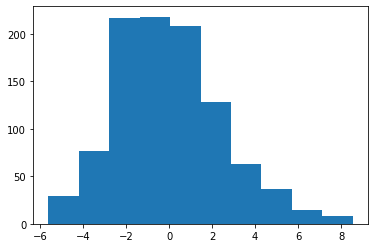

In [26]:
plt.hist(X[0]) # this plots the histogram 

In [27]:
X = GPU_data(X) # this assigns gpu data of X to variable X
Y = GPU_data(Y) # this assigns gpu data of Y to variable Y

In [28]:
def softmax(x): # this defines a funciton to be carried out 
    s1 = torch.exp(x - torch.max(x,1)[0][:,None]) # this is a funciton to be carried out and stored in variable s1
    s = s1 / s1.sum(1)[:,None] # this is a funciton to be carried out and stored in variable s
    return s # this outputs s 

In [29]:
def cross_entropy(outputs, labels): # this defines a funciton to be carried out 
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0] # this outputs the result

In [30]:
def randn_trunc(s): #Truncated Normal Random Numbers. This defines a funciton to be carried out 
    mu = 0 # this assigns value 0 to variable mu
    sigma = 0.1 # this assigns value 0.1 to variable sigma 
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma) # this is a funciton to be carried out and stored in variable R
    return R.rvs(s) # this outputs the result 

In [31]:
def Truncated_Normal(size): # this defines a funciton to be carried out 

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2) # this is a funciton to be carried out and stored in variable u1
    u2 = torch.rand(size) # this is a funciton to be carried out and stored in variable u2
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2) # this is a funciton to be carried out and stored in variable z

    return z # this outputs the result 

In [32]:
def acc(out,y): # this defines a funciton to be carried out 
    with torch.no_grad(): # this uses a directory to carry out another function
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0] # this outputs the result

In [33]:
X.shape # this is the shape of X

torch.Size([50, 1000])

In [34]:
def get_batch(mode): # this defines a funciton to be carried out 
    b = c.b # this assigns the product of c and b to variable b
    if mode == "train": # this is a nested if then else statement 
        r = np.random.randint(X.shape[0]-b) # this is a funciton to be carried out and stored in variable r
        x = X[r:r+b,:] # this is a funciton to be carried out and stored in variable x
        y = Y[r:r+b] # this is a funciton to be carried out and stored in variable y
    elif mode == "test": # this is a nested else if then statement 
        r = np.random.randint(X_test.shape[0]-b) # this is a funciton to be carried out and stored in variable r
        x = X_test[r:r+b,:] # this is a funciton to be carried out and stored in variable x
        y = Y_test[r:r+b] # this is a funciton to be carried out and stored in variable y
    return x,y # this outputs x and y 

In [35]:
def model(x,w): # this defines a funciton to be carried out 

    return x@w[0] # this outputs the result and is another way of matrix multiplication

In [36]:
def make_plots(): # this defines a funciton to be carried out 
    
    acc_train = acc(model(x,w),y) # this is a test data set that is stored in variable acc train
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train}) # this logs the data 

In [39]:
wb.init(project="Linear_Model_Photo_1"); # this holds the first linear model photo
c = wb.config # this assigns the configuration to variable c 

c.h = 0.001 # this assigns the value 0.001 to the variable c.h
c.b = 32 # this assigns the value 32 to the variable c.b
c.epochs = 100000 # this assigns the value 100000 to the variable c.epochs

w = [GPU(Truncated_Normal((1000,2)))] # this stores the truncated normal gpu data in variable w

optimizer = torch.optim.Adam(w, lr=c.h) # this optimizes the data and stores it in variable optimizer 

for i in range(c.epochs): # this is a for loop

    x,y = get_batch('train') # this gets a batch of test data and stores in in variable x,y

    loss = cross_entropy(softmax(model(x,w)),y) # this calculates the loss 

    optimizer.zero_grad() # this optimizes the gradient of 0
    loss.backward() # this is the loss backwards 
    optimizer.step() # this helps optimize the data 
   
    wb.log({"loss": loss}) # this logs the loss 

    make_plots() # this plots the graphs


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/click/termui.py", line 129, in prompt_func
    return f("")
  File "/usr/local/lib/python3.8/dist-packages/click/termui.py", line 54, in hidden_prompt_func
    return getpass.getpass(prompt)
  File "/usr/local/lib/python3.8/dist-packages/ipykernel/kernelbase.py", line 843, in getpass
    return self._input_request(prompt,
  File "/usr/local/lib/python3.8/dist-packages/ipykernel/kernelbase.py", line 904, in _input_request
    raise KeyboardInterrupt("Interrupted by user") from None
KeyboardInterrupt: Interrupted by user

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/

Exception: ignored

#Best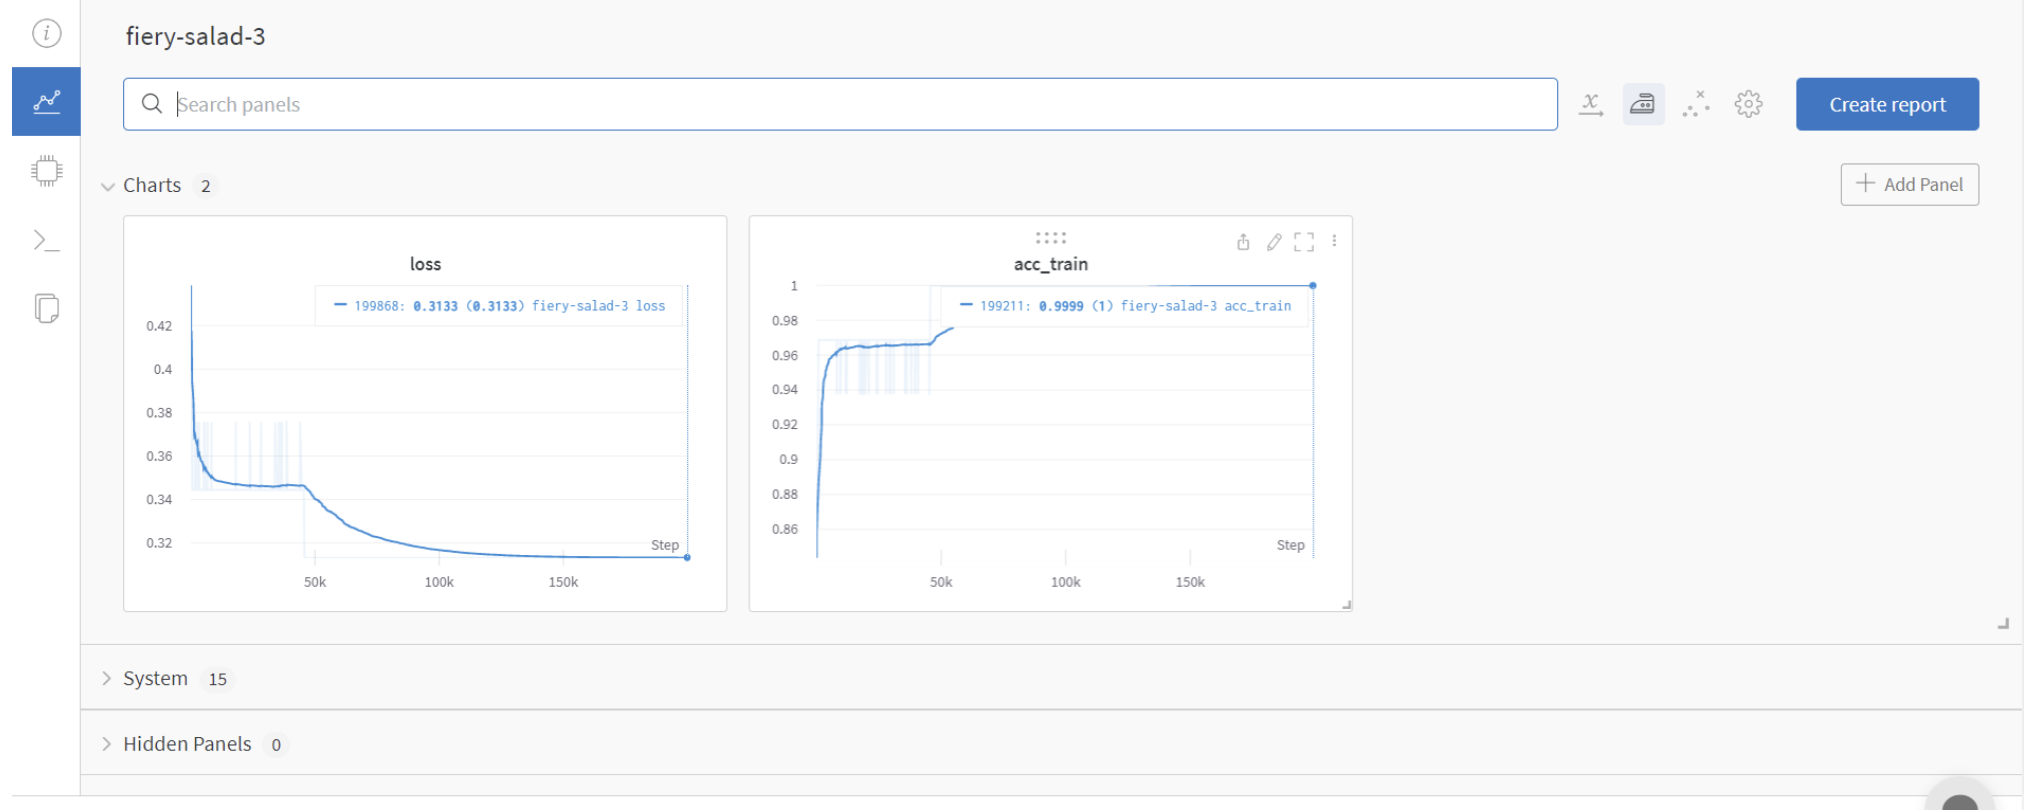

#Worst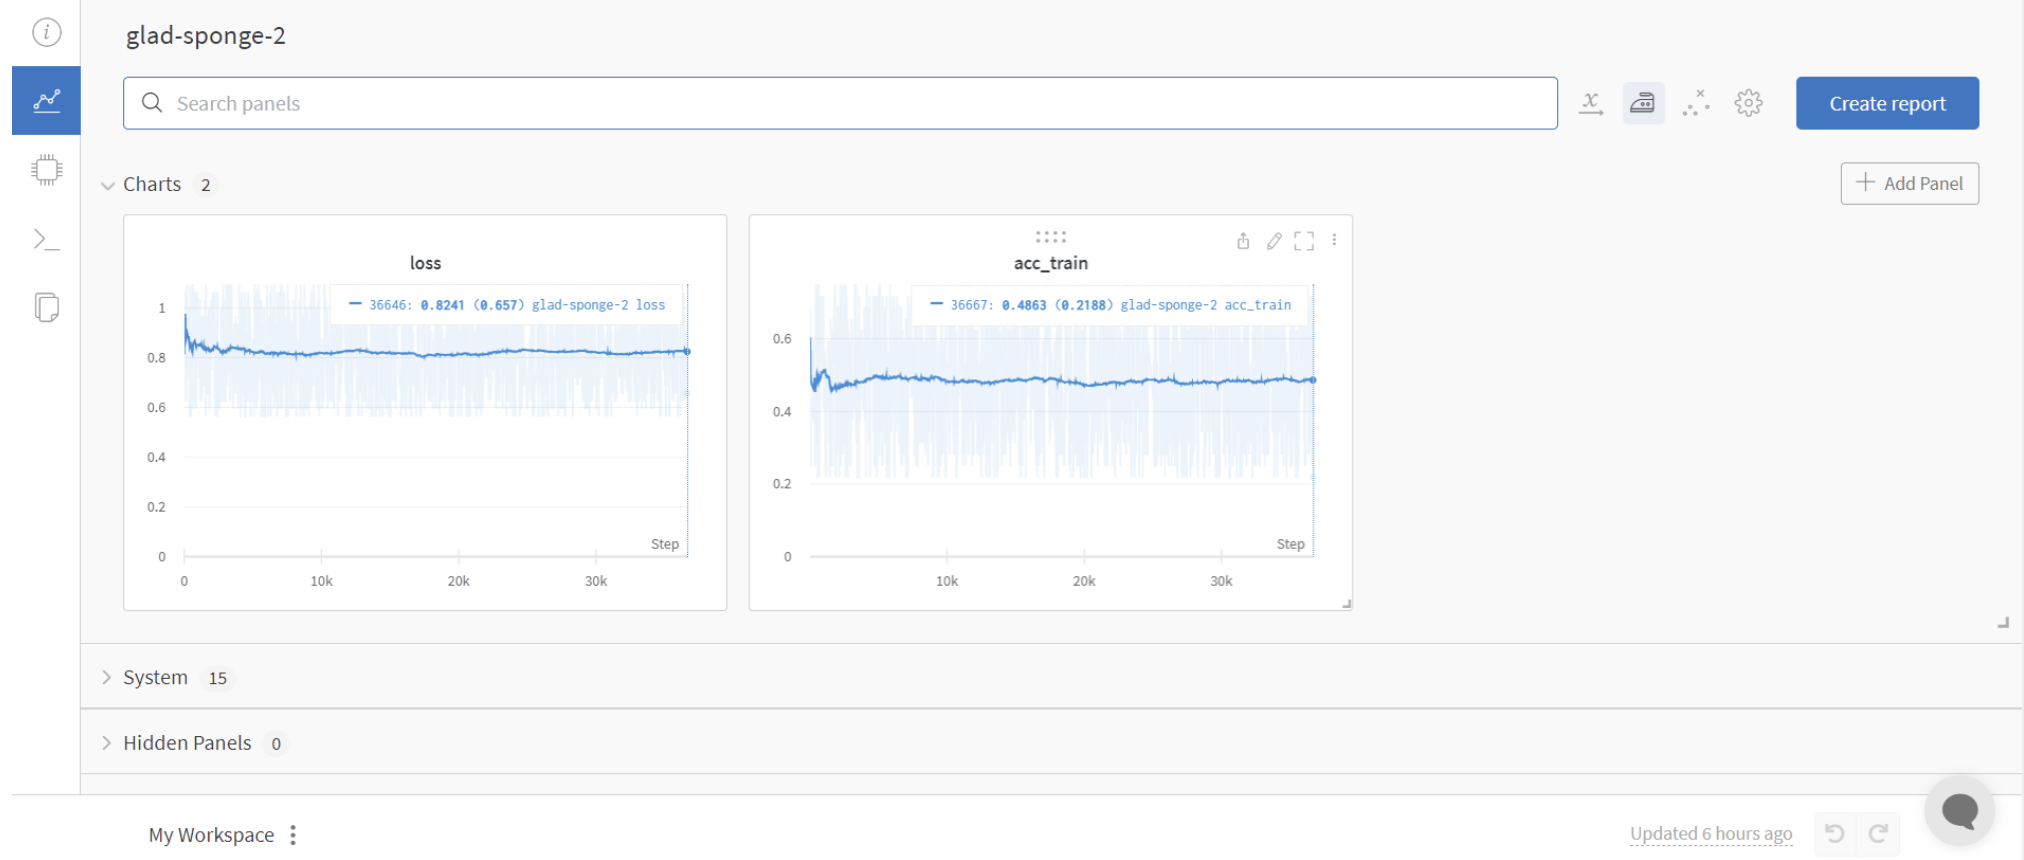

#Average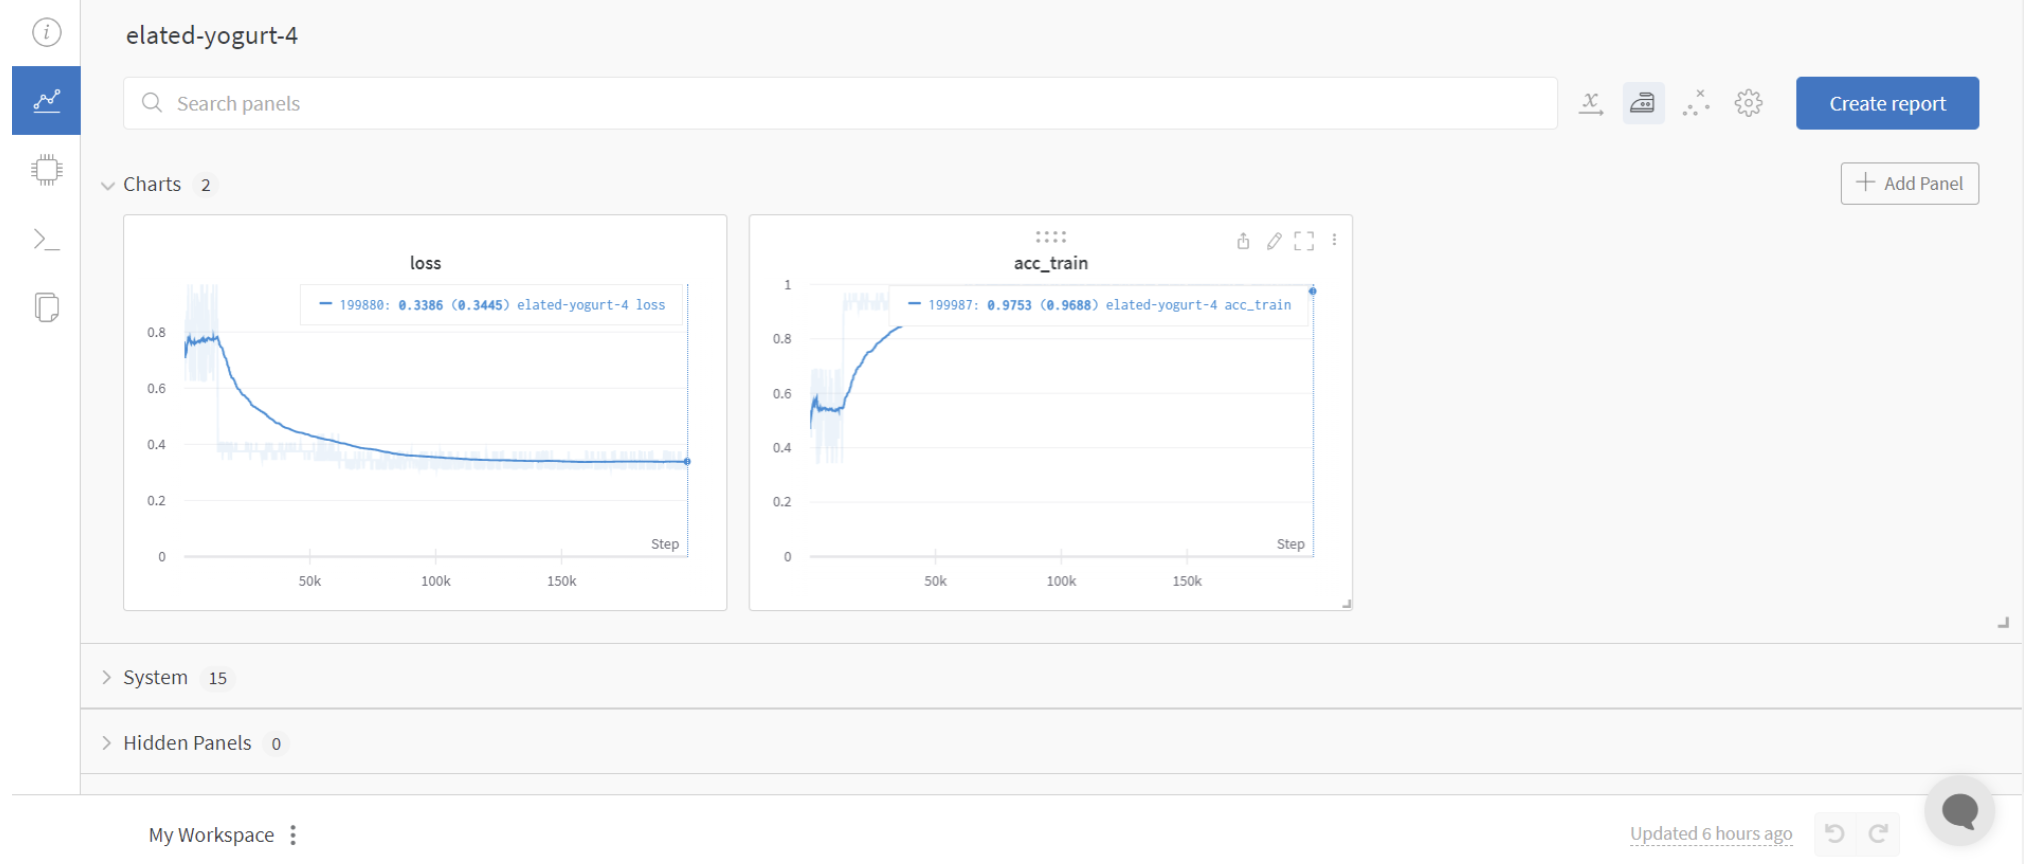

https://tensorspace.org/